<a href="https://colab.research.google.com/github/ARU-Bioinformatics/ARU-Bioinf-CMA-2021/blob/main/Week_7/tutorial_14_restriction_digest_function_meets_the_Big_O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restriction digest function meets the Big O

We can modify the code to handle different lengths of input DNA sequences, measure the time it takes to search for the restriction site in each case, and then plot these times to visualize the algorithm's complexity.

For this example, we'll:

*  Generate DNA sequences of varying lengths.
*  Measure the search time for each sequence.
*  Plot these times to show the relationship between input size and search time.

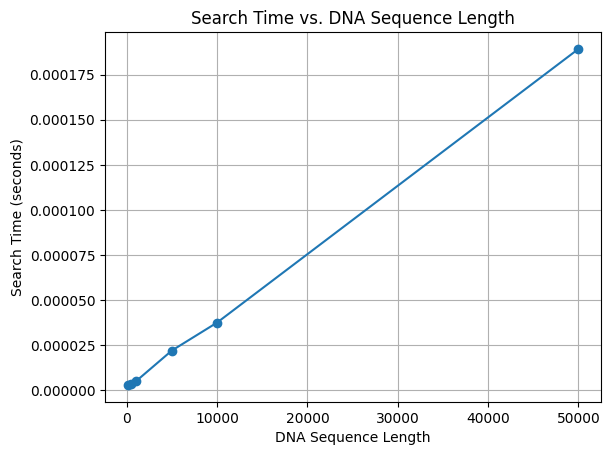

In [1]:
import time
import matplotlib.pyplot as plt
import random  # Import the random module

def search_restriction_sites(dna_sequence, recognition_sequence):
    """
    Searches for recognition sites and returns the time taken to find them.
    """
    start_time = time.time()

    # The same search logic as we used before in week 4
    cut_sites = []
    start = 0
    while True:
        start = dna_sequence.find(recognition_sequence, start)
        if start == -1:
            break
        cut_sites.append(start + 1)
        start += len(recognition_sequence)

    # Calculate and return the search time
    search_time = time.time() - start_time
    return search_time

# Define the recognition sequence (feel free to swap for a restriction site of choice)
recognition_sequence = "GAATTC"

# Generate DNA sequences of varying lengths
sequence_lengths = [100, 500, 1000, 5000, 10000, 50000]
search_times = []

for length in sequence_lengths:
    # Generate a random DNA sequence of the specified length
    dna_sequence = ''.join(['ACGT'[int(random.random()*4)] for _ in range(length)])

    # Measure the search time for this DNA sequence
    search_time = search_restriction_sites(dna_sequence, recognition_sequence)
    search_times.append(search_time)

# Plotting the search times
plt.plot(sequence_lengths, search_times, marker='o')
plt.title('Search Time vs. DNA Sequence Length')
plt.xlabel('DNA Sequence Length')
plt.ylabel('Search Time (seconds)')
plt.grid(True)
plt.show()


## This code does the following:

It defines a function search_restriction_sites that searches for the recognition sequence within a given DNA sequence and returns the time taken to perform the search.
It then generates DNA sequences of different lengths and measures the search time for each sequence using the defined function.
Finally, it plots these search times against the sequence lengths to visualize how the search time scales with input size.
This plot will help illustrate the concept of algorithmic complexity, specifically how the time complexity of the search operation scales with the size of the input data (in this case, the length of the DNA sequence). Note that the actual complexity might depend on the implementation of the find method in Python and how it behaves with increasing string lengths.*italicised text*

We have introduced a new thing into this script, we have added in a line to generate some DNA sequences.

`dna_sequence = ''.join(['ACGT'[int(random.random()*4)] for _ in range(length)])`
Python is very powerful to generate mock DNA strings. This line generates a random DNA sequence of a specified length. DNA sequences consist of four nucleotides represented by the letters A, C, G, and T. The goal here is to create a string composed of random sequences of these letters. Here's how the line works, building up the command step by step:

*  `'ACGT'`: This string contains the four nucleotide bases that make up DNA.

*  `random.random()`: This function call generates a random floating-point number between 0.0 and 1.0.

*  `random.random()*4`: Since random.random() generates a number between 0 and 1, multiplying by 4 scales this to a range between 0 and 4. This is done because there are four possible nucleotides (A, C, G, T), and we want to select one of them randomly.

*  `int(random.random()*4)`: By wrapping the multiplication in int(...), we convert the floating-point number to an integer. This conversion is necessary because we'll use this integer as an index to select a character from the string 'ACGT'. The int() function truncates (or cuts off) any decimal part, so the result is always an integer 0, 1, 2, or 3, each corresponding to a position in the string 'ACGT'.

*  `'ACGT'[int(random.random()*4)]`: This part selects a character from the string 'ACGT' at the index determined by int(random.random()*4). Since the index is a random number between 0 and 3, it selects one of the four nucleotides at random.

*  `for _ in range(length)`: This loop repeats the random selection process length times to generate a sequence of nucleotides of the desired length. The underscore _ is used as a variable name when the variable itself is not needed; here, it just means "repeat this operation length times".

*  `['ACGT'[int(random.random()*4)] for _ in range(length)]`: This is a list comprehension, a compact way to create lists in Python. It builds a list of random nucleotides, where each element in the list is a nucleotide selected as described above.

*  1''.join([...])`: Finally, the join() method concatenates (or "joins") all the elements of the list into a single string, with each element being a nucleotide. The '' before .join indicates that no additional characters will be inserted between the nucleotides in the final string. So, it converts the list of single characters ('A', 'C', 'G', 'T') into a continuous DNA sequence string.


## How complex is our algorithm?

The Big O notation for the approach used in our DNA sequence generation and search algorithm needs to be analyzed in two parts: generating the DNA sequence **and** searching for the recognition sequence within the generated DNA.

### Generating the DNA Sequence
The DNA sequence generation step involves creating a random sequence of nucleotides ('A', 'C', 'G', 'T') of a specified length. This is done by iterating through a loop a number of times equal to the desired length of the DNA sequence, where each iteration involves selecting a random nucleotide and adding it to the sequence. Since this operation is repeated once for each element of the sequence, the time complexity is directly proportional to the length of the sequence. Thus, the Big O notation for generating the DNA sequence is *O(n)*, where n is the length of the DNA sequence.

### Searching for the Recognition Sequence
The search operation involves finding occurrences of a specific recognition sequence within the generated DNA sequence. The worst-case scenario for the find method (used to locate the recognition sequence) occurs when it needs to check each character in the DNA sequence against the recognition sequence. In the worst case, this can result in checking nearly all characters in the DNA sequence for each character in the recognition sequence until a match is found or confirmed not to be present.

Assuming the recognition sequence is of length *m*, and the DNA sequence is of length n, the worst-case time complexity for the naive string matching algorithm implemented by find (in its worst case) can approach *O(n * m)*, particularly when the recognition sequence is not found, or if the sequences are such that many partial matches are found before determining a mismatch.

However, Python's `str.find()` is optimized and employs more efficient algorithms under the hood (like Boyer-Moore), which on average perform better than the naive approach, often resulting in time complexities better than `O(nm)` for practical use cases. Yet, to understand the worst-case scenario without making assumptions about the specific implementation details of str.find(), considering the worst-case complexity as `O(nm)` is a conservative approach.

### Overall Complexity
Considering both parts, the overall time complexity of the approach is determined by the more costly operation. If we are analysing the total operation that includes both generation and searching, and if the length of the recognition sequence is significantly smaller than the length of the DNA sequence (which is usually the case), the generation's complexity (*O(n)*) and the worst-case search complexity (*O(nm)*) together would primarily be dominated by the search operation. Thus, the overall complexity could be described as *O(n)* for sequence generation plus *O(nm)* for searching, emphasising that search complexity severely impacts an algorithm's efficiency.